In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'], inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

7661

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(21359, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [14]:
df['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

From the above two cells it is clear that the hotel does couple bookings more as compared to single booking.

In [15]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

So I ran the value counts of all the columns and here is my obsrvation about the hotel reservations.

1) Majority of people book for week nights. There are some people who book for weekends.

2) Majority of people book for Meal plan 1

3) Most of the people donot opted for car space.

4) Room type 1 is the most preferred room type.

5) Majority of people prefer online reservations.

6) Majority of the guest have booked for the first time.

7) Data is quite imbalance. More Not cancelled bookings as compared to cancelled bookings.


In [16]:
cat_cols=['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','booking_status']
num_cols=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','arrival_year','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']


In [17]:
len(cat_cols)

6

In [18]:
len(num_cols)

12

DATA ANALYSIS

In [19]:
data=df.copy()

In [20]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS

Histogram and Box plots

In [21]:
def num_plot_dist(df,num_features):
    fig,axes=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))  #This len(num_features)*5 is the number of rows assigned to each feature in each plot. The height of each plot
    if len(num_features)==1:
        axes=[axes]
    for i, column in enumerate(num_features):  #This gives the index with columns for eg (0,no_of_adults), (1,no_of_children), etc
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")
    plt.tight_layout()
    plt.show()

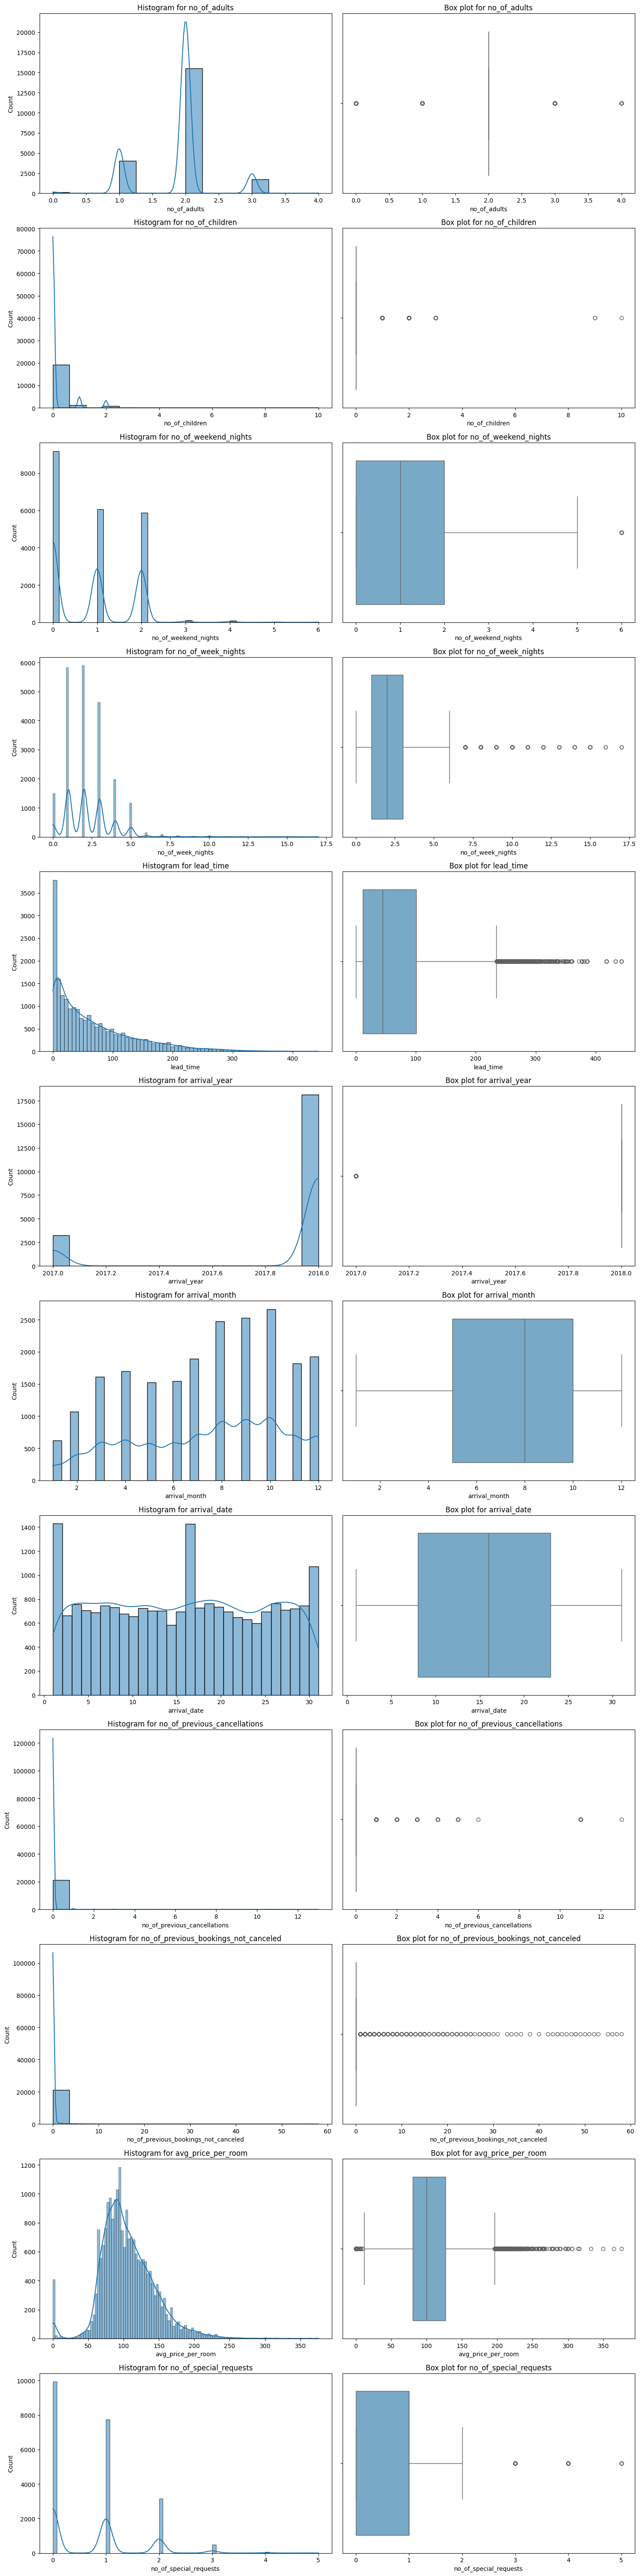

In [22]:
num_plot_dist(data,num_cols)

UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS

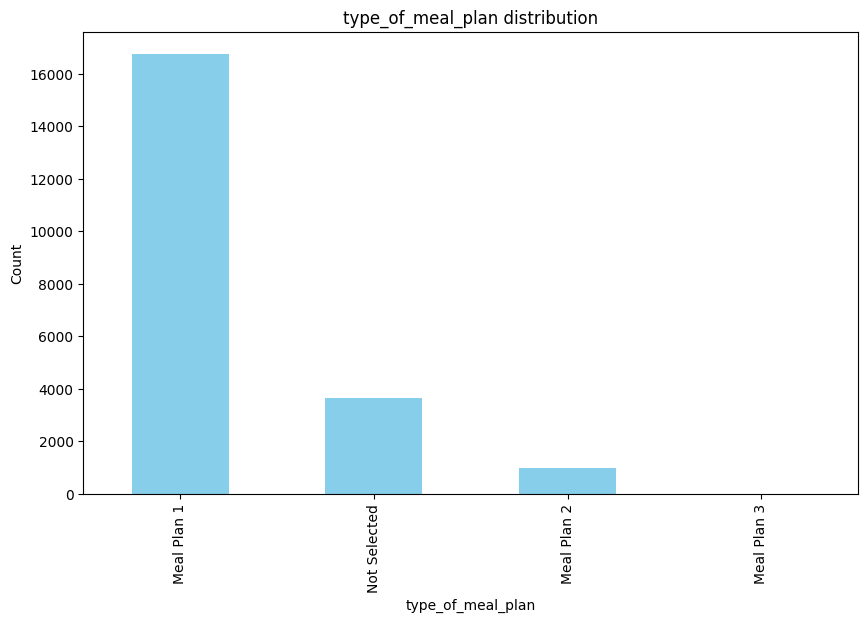

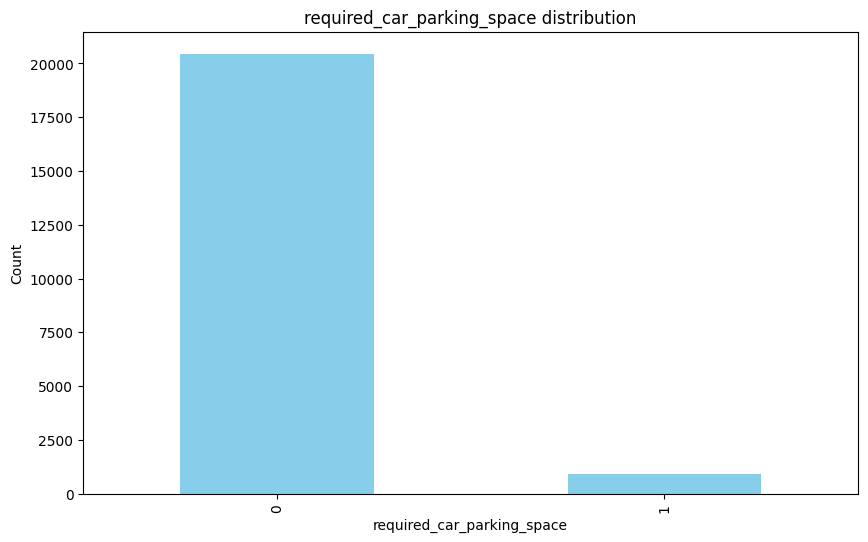

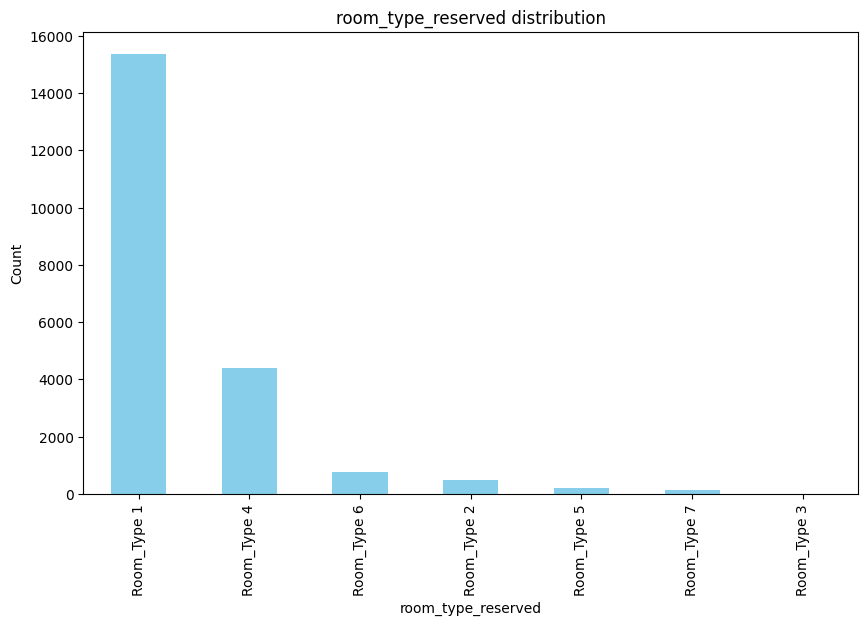

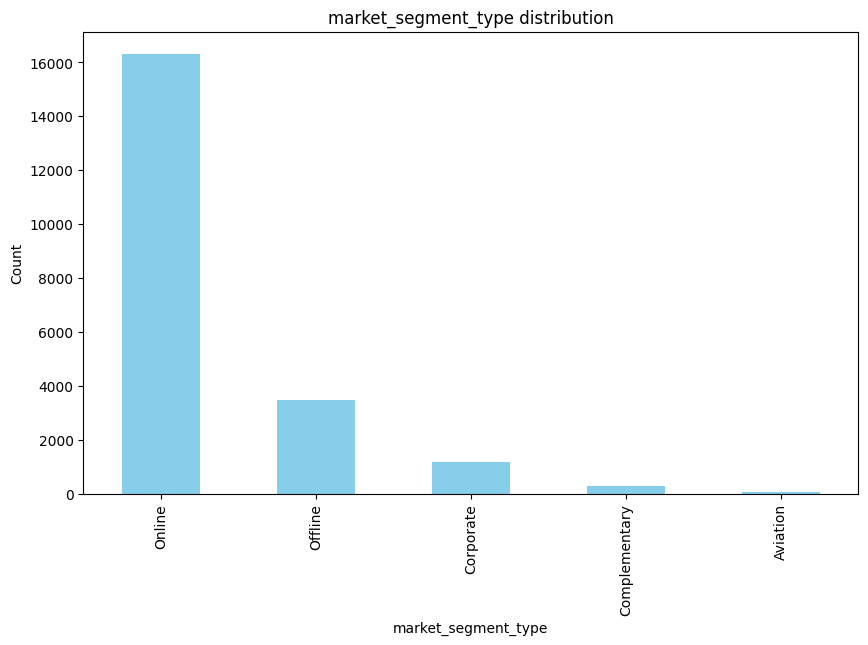

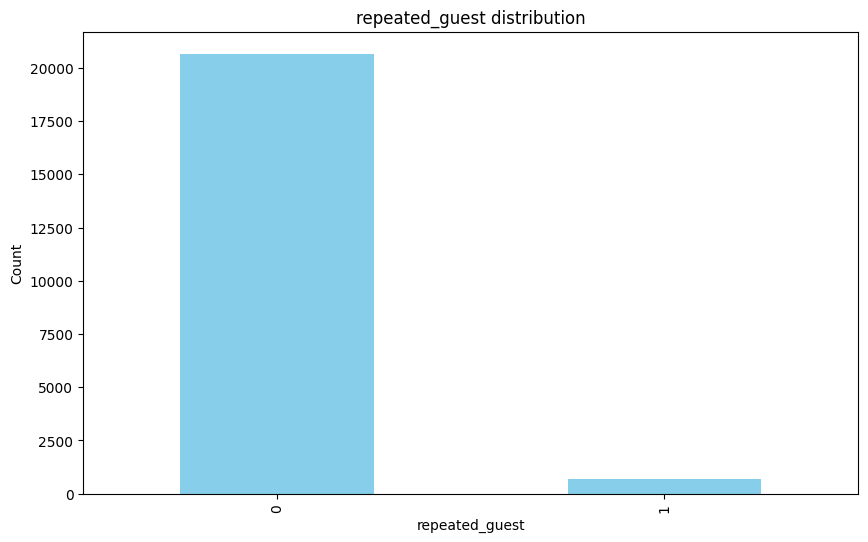

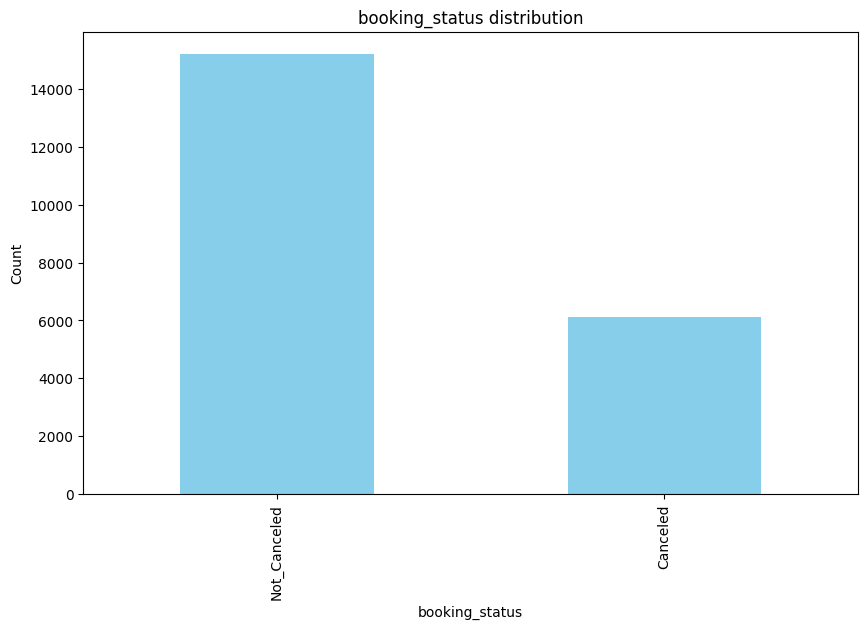

In [23]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()
    

BIVARIATE ANALYSIS FOR NUMERICAL COLUMNS

In [24]:
def plot_bivariate_num(df,target,num_features):
    num_plots=len(num_features)
    num_rows=(num_plots+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten() #We are accessing like ax=axes[i]. This is possible only when we convert 2d to 1d
   
    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette="Blues")
        axes[i].set_title(f"{column} VS {target}")
    plt.tight_layout()
    plt.show()
    

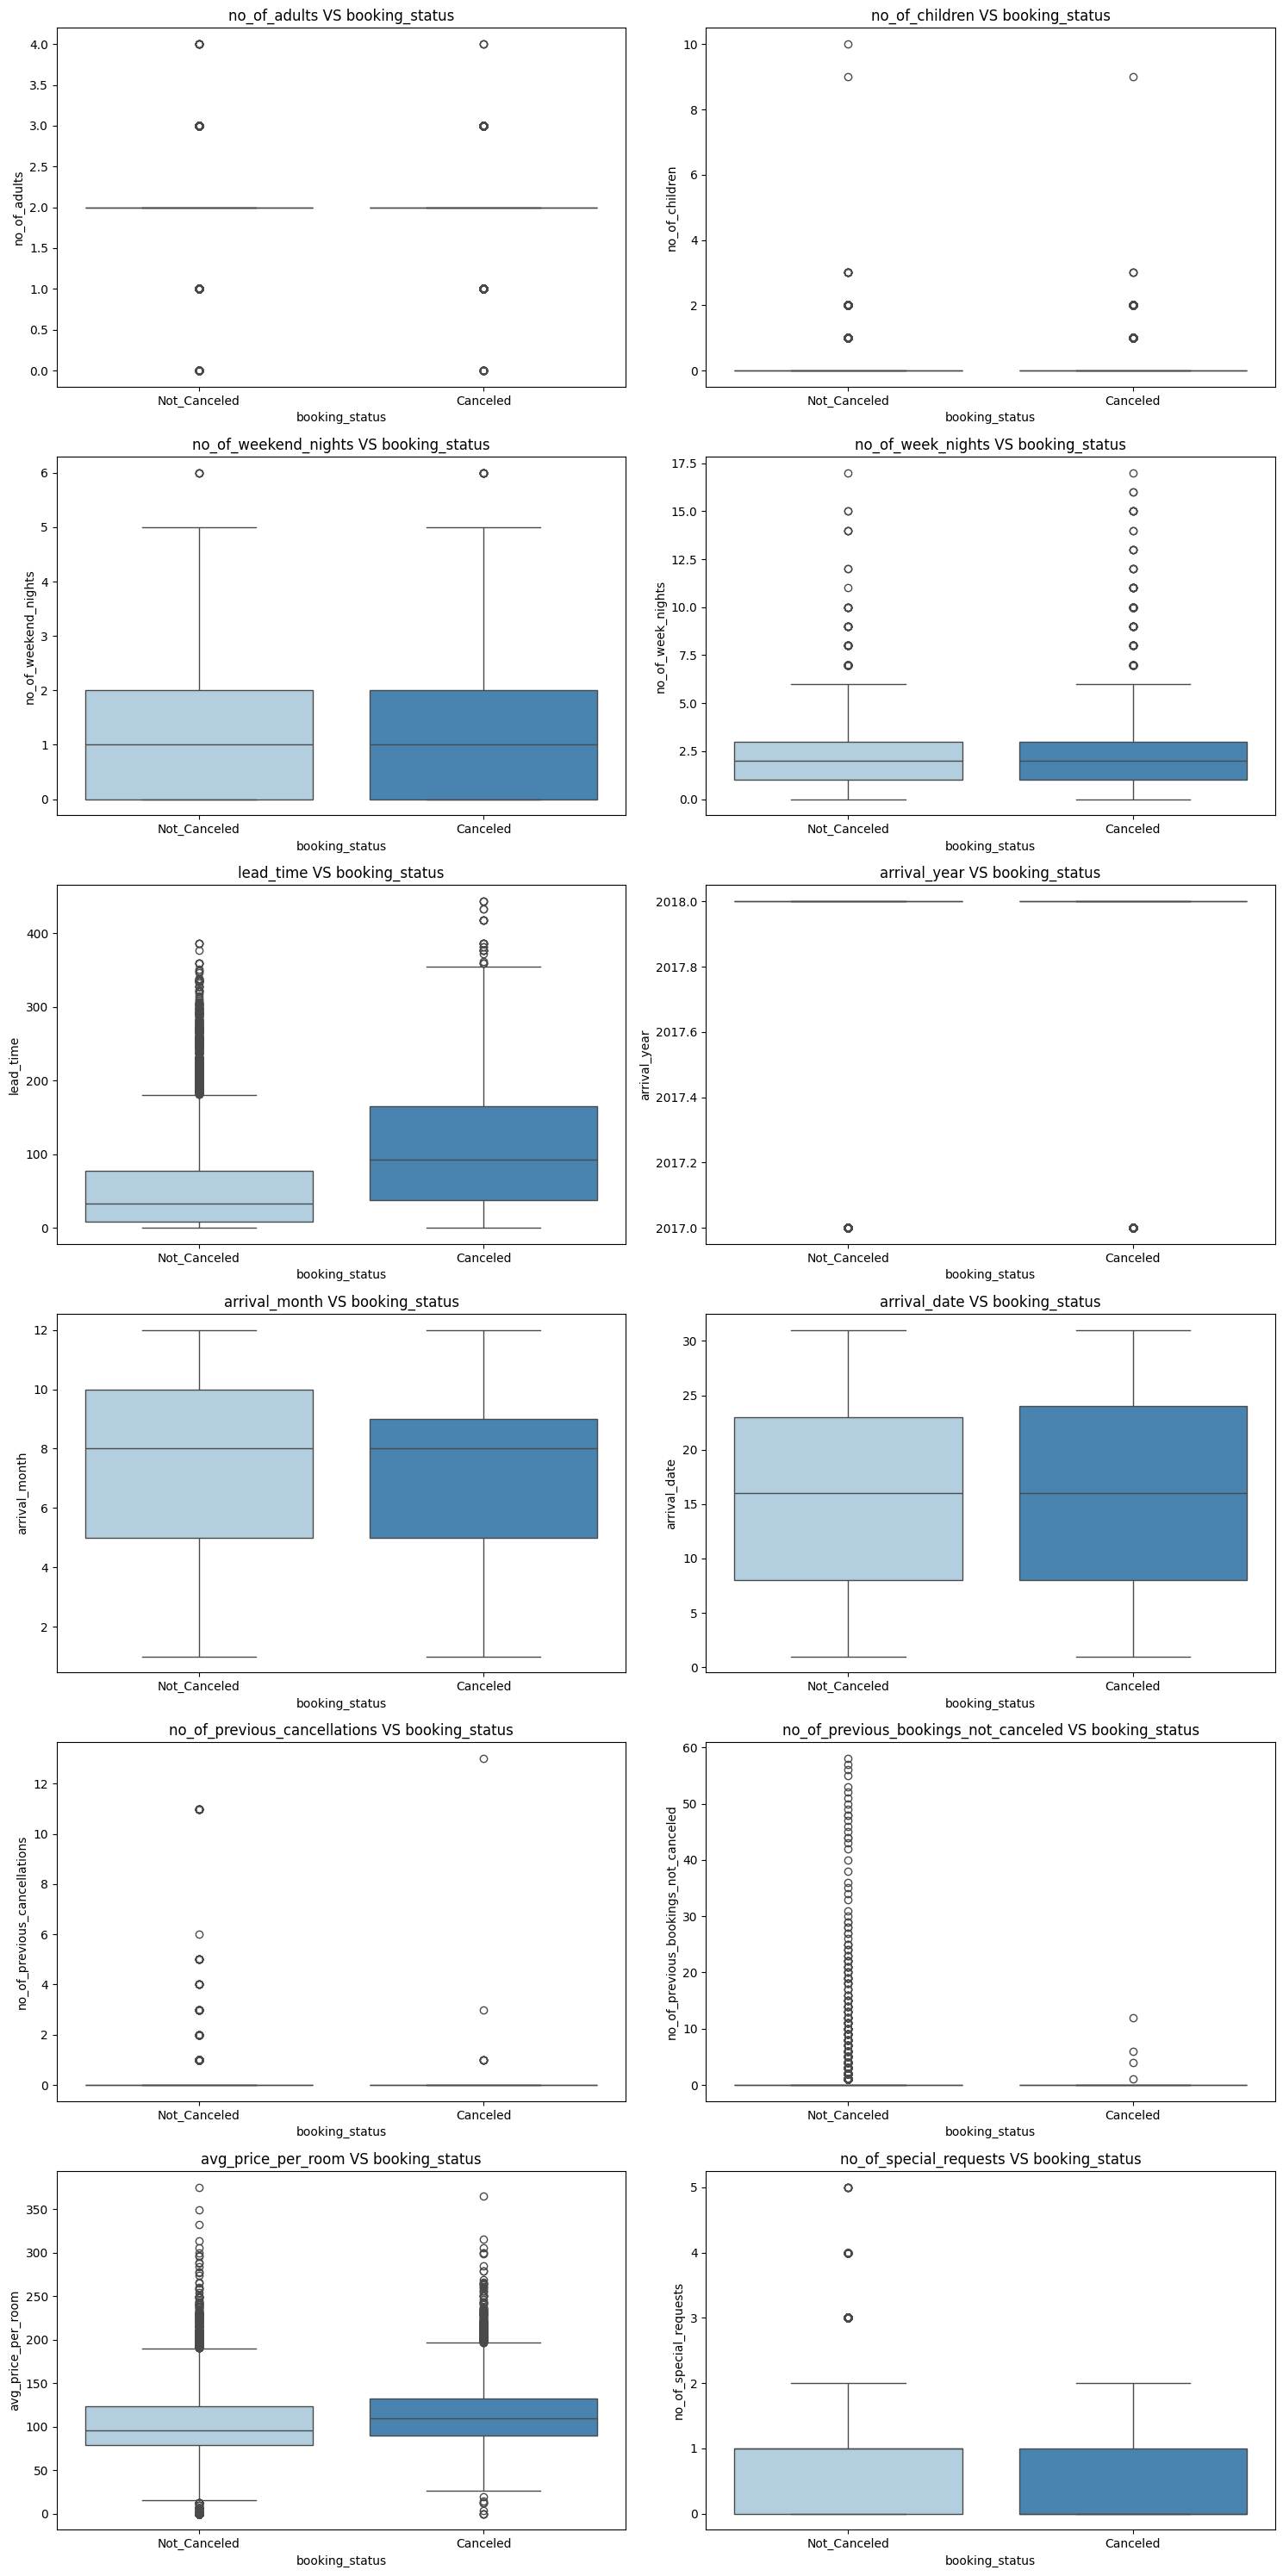

In [25]:
plot_bivariate_num(data,'booking_status',num_cols)

From the above graphs you can see that as th ledtime increases the probability of cancellation also increases.

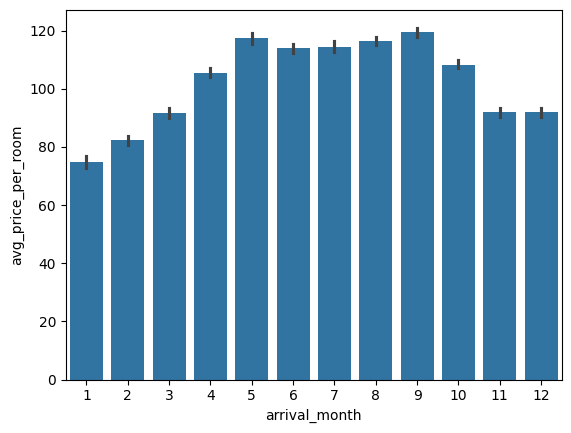

In [26]:
#Quick observation- From the belo graph we observed that during the peak season(see graph bar plot for arrival month above), the average price per room is high. Hotels are more expensive during the peak season.
sns.barplot(x='arrival_month',y='avg_price_per_room',data=data)
plt.show()

Bivariate Analysis for Categorical Columns

In [27]:
def plot_bivariate_cat(df,target,cat_features):
    num_plots=len(cat_features)
    num_rows=(num_plots+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten() #We are accessing like ax=axes[i]. This is possible only when we convert 2d to 1d
   
    for i, feature in enumerate(cat_features):
        sns.countplot(data=df, x=feature, hue=target, ax=axes[i], palette="Set2")
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x',rotation=90) #The tick_params is used to rotate the x axis labels
    plt.tight_layout()
    plt.show()
    

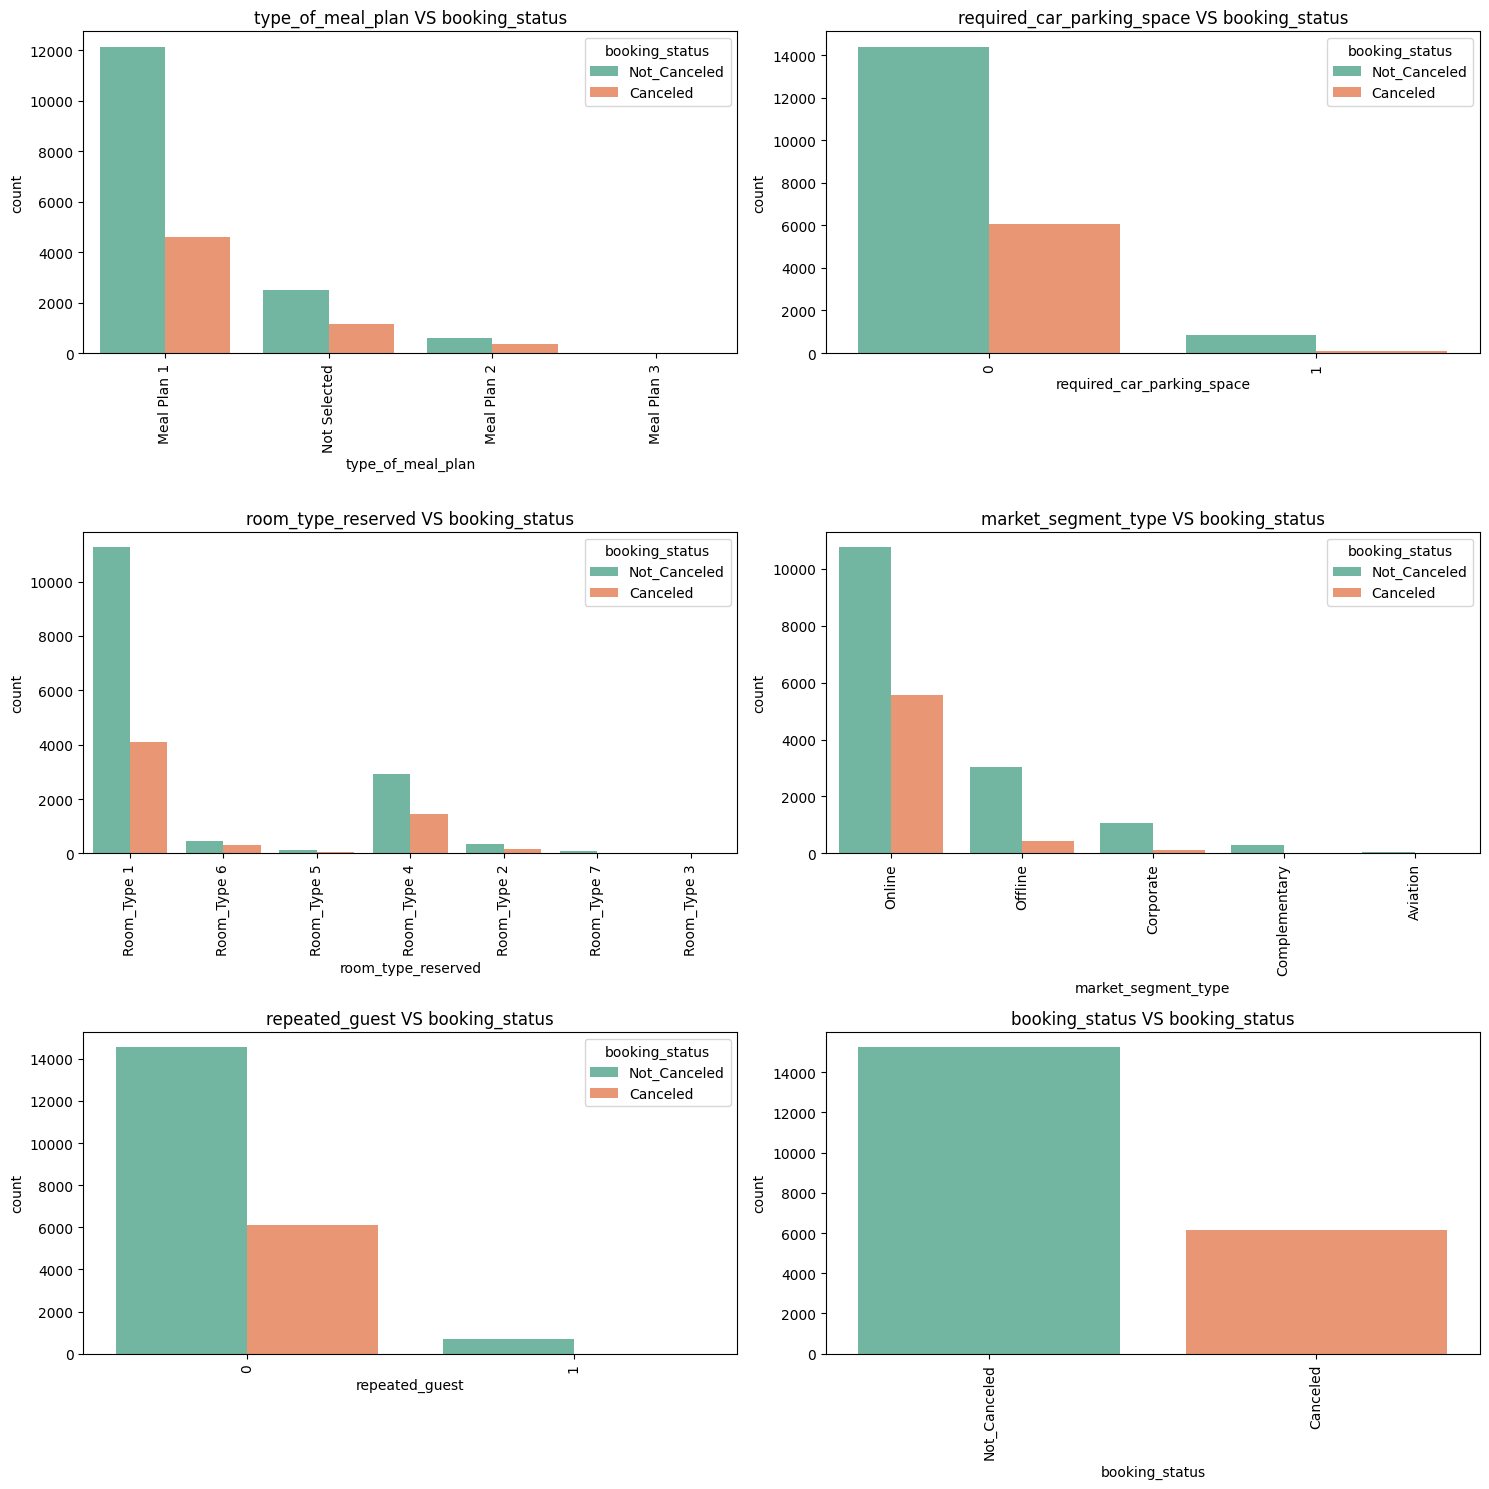

In [28]:
plot_bivariate_cat(data,'booking_status',cat_cols)

From the above graphs,

1) If a person is reserving the parking then there is very less chance of cancellation.

2) If he/she is a repeated customer then there is less chance of cancellation.

3) If a person plans for meal plan 2 then there is chance of cancellation.

# DATA PROCESSING

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [31]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

mappings={}

for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [32]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [33]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [35]:
## Multicollinearity
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [37]:
X=add_constant(df) #Adding the bias term

vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [38]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


OUR DATA DON'T HAVE MULTICOLLINEARITY

In [39]:
corr=df.corr()

In [40]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

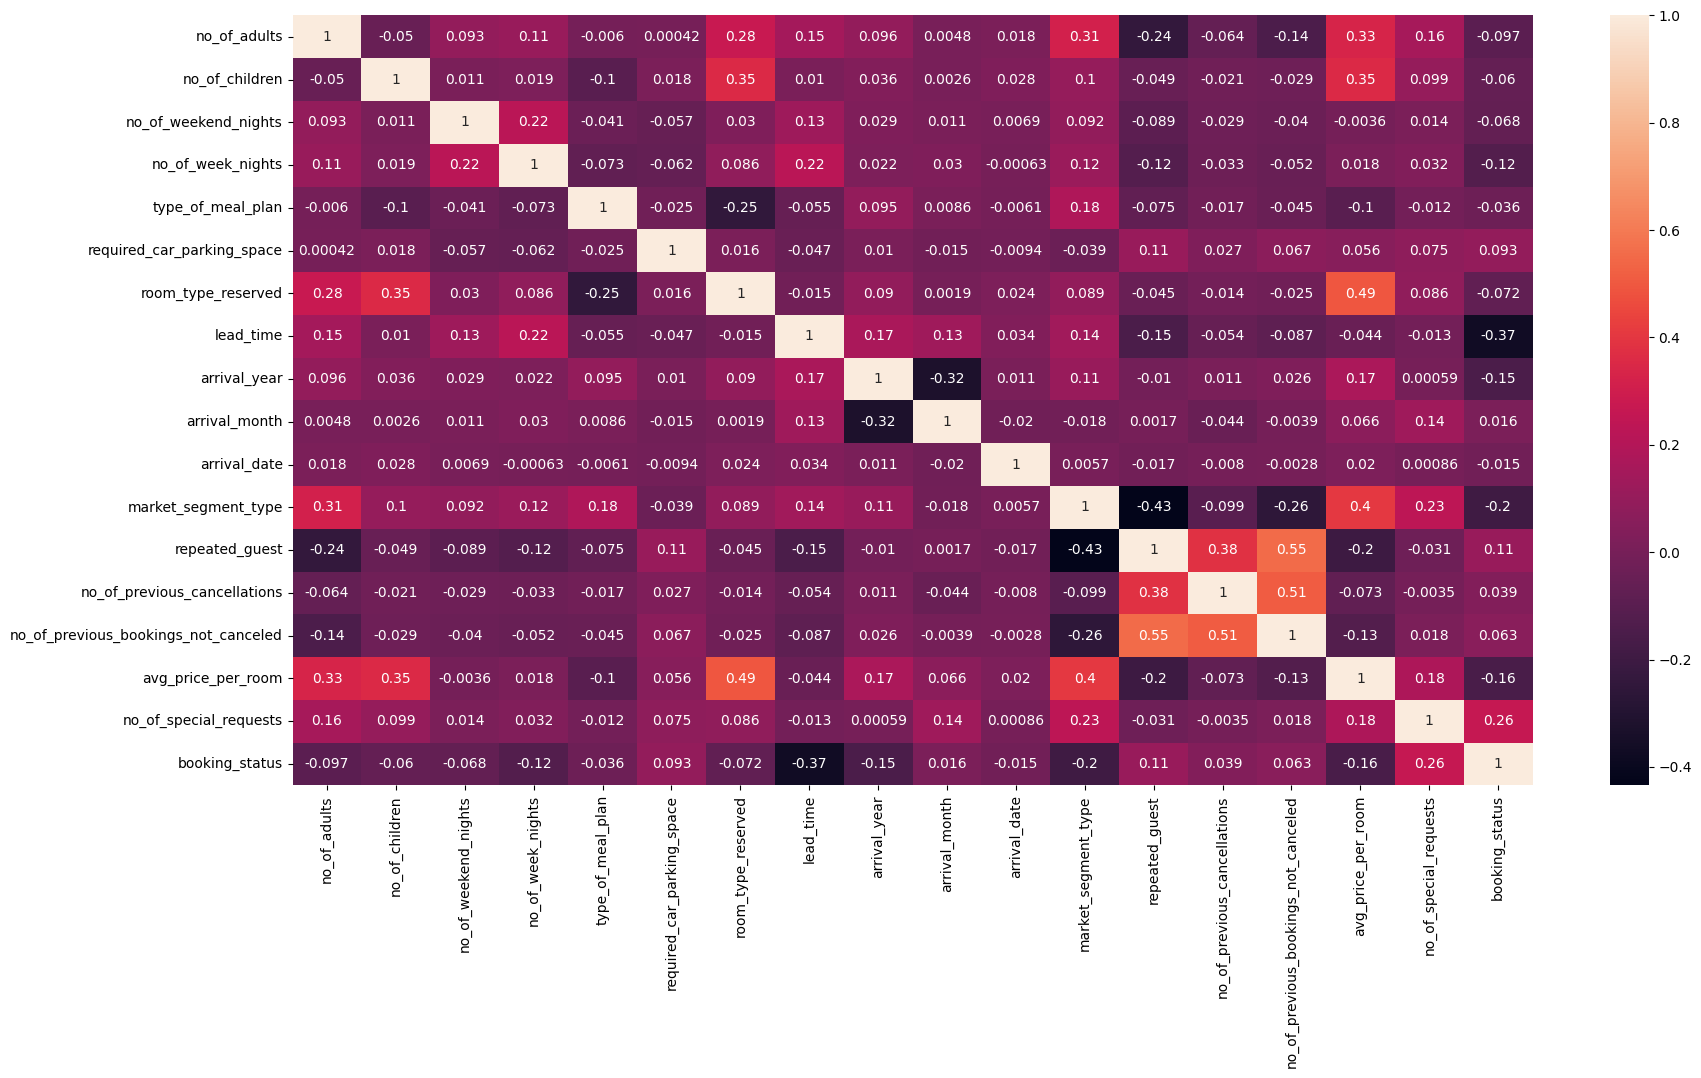

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

Here we can see there is negative relation between booking_status and lead_time means there is a negative correlation. It means if the lead time is high then the probability of confirmation is low and vice versa.

In [42]:
###Skewness
skeweness=df.skew()
skeweness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [43]:
for col in df.columns:
    if skeweness[col]>5:
        df[col]=np.log1p(df[col])

In [44]:
###Skewness after applying log transform. Skweness is reduced for no_of_previous_cancellations and no_of_previous_bookings_not_canceled
skeweness=df.skew()
skeweness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [45]:
#Handling Imbalance data
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [46]:
X=df.drop('booking_status',axis=1)
y=df['booking_status']

In [47]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [48]:
!pip install imblearn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)


In [51]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [52]:
#Creating new datafram with resampled data
balanced_df=pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status']=y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [53]:
balanced_df.shape

(30462, 18)

In [54]:
df=balanced_df.copy()

In [55]:
df.shape

(30462, 18)

In [56]:
##Feature Selection using Random forest feature importance technique
from sklearn.ensemble import RandomForestClassifier


In [57]:
X=df.drop('booking_status',axis=1)
y=df['booking_status']

In [58]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [59]:
feature_importance=model.feature_importances_

In [60]:
feature_importance_df=pd.DataFrame({'feature':X.columns,'importance':feature_importance})

In [61]:
top_feature_importance_df=feature_importance_df.sort_values('importance',ascending=False) #This score we get are the sum of gini decrease for each split for each feature in the trees across the whole forest

In [62]:
top_feature_importance_df

,feature,importance
7,lead_time,0.263023
16,no_of_special_requests,0.185696
15,avg_price_per_room,0.151248
9,arrival_month,0.085186
10,arrival_date,0.084384
11,market_segment_type,0.053044
3,no_of_week_nights,0.044631
2,no_of_weekend_nights,0.030857
4,type_of_meal_plan,0.020346
6,room_type_reserved,0.019262


In [63]:
top_10_features = top_feature_importance_df.head(10)["feature"].tolist()
top_10_df = df[top_10_features + ["booking_status"]]

In [64]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [65]:
len(top_10_df.columns)

11

In [66]:
df=top_10_df.copy()

In [67]:
# !pip install xgboost lightgbm catboost 

MODEL SELECTION

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [69]:
X=df.drop('booking_status',axis=1)
y=df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
classifiers={
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "AdaBoost" : AdaBoostClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(random_state=42),
    "Support Vector Machine" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "CatBoost" : CatBoostClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42),
    "LightGBM" : LGBMClassifier(random_state=42)
}

In [71]:
metrics={
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [72]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)


Learning rate set to 0.040282
0:	learn: 0.6676293	total: 165ms	remaining: 2m 44s
1:	learn: 0.6457724	total: 176ms	remaining: 1m 28s
2:	learn: 0.6251060	total: 183ms	remaining: 1m
3:	learn: 0.6068595	total: 194ms	remaining: 48.4s
4:	learn: 0.5870767	total: 205ms	remaining: 40.9s
5:	learn: 0.5731732	total: 212ms	remaining: 35.1s
6:	learn: 0.5601041	total: 224ms	remaining: 31.8s
7:	learn: 0.5478707	total: 232ms	remaining: 28.8s
8:	learn: 0.5376423	total: 243ms	remaining: 26.8s
9:	learn: 0.5277487	total: 256ms	remaining: 25.3s
10:	learn: 0.5174950	total: 264ms	remaining: 23.7s
11:	learn: 0.5098232	total: 273ms	remaining: 22.5s
12:	learn: 0.5013573	total: 279ms	remaining: 21.2s
13:	learn: 0.4944084	total: 289ms	remaining: 20.4s
14:	learn: 0.4880400	total: 295ms	remaining: 19.4s
15:	learn: 0.4823052	total: 304ms	remaining: 18.7s
16:	learn: 0.4770642	total: 311ms	remaining: 18s
17:	learn: 0.4719623	total: 320ms	remaining: 17.5s
18:	learn: 0.4657574	total: 328ms	remaining: 16.9s
19:	learn: 0.4

In [73]:
metrics_df=pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,Gradient Boosting,0.837190,0.821473,0.864821,0.842590
2,AdaBoost,0.804202,0.821294,0.781433,0.800868
3,Logistic Regression,0.774331,0.802787,0.731922,0.765718
4,Support Vector Machine,0.720335,0.729657,0.706840,0.718068
5,Decision Tree,0.840801,0.850000,0.830619,0.840198
6,K-Nearest Neighbors,0.779419,0.856612,0.675244,0.755191
7,Gaussian Naive Bayes,0.773346,0.803232,0.728664,0.764133
8,CatBoost,0.870671,0.861305,0.885993,0.873475
9,XGBoost,0.870343,0.866324,0.878176,0.872210


In [74]:
## TRAIN RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [75]:
X=df.drop('booking_status',axis=1)
y=df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
rf=RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=81; total time=   1.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=81; total time=   1.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=81; total time=   1.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=81; total time=   1.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=81; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=92; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=92; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=92; total time=   1.6s
[CV] END b

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024313C04F80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002430C500F80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000243139B9D60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024313A12ED0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [86]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 67}

In [87]:
best_rf = random_search.best_estimator_

In [88]:
y_pred=best_rf.predict(X_test)


In [89]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [90]:
acc

0.8916789758739537

In [91]:
precision

0.8919973975276513

In [92]:
recall

0.8931596091205212

In [93]:
f1

0.892578125

In [95]:
#Saving the model

import joblib
joblib.dump(best_rf, 'random_forest.pkl')

['random_forest.pkl']

In [96]:
loaded_model=joblib.load("random_forest.pkl")

In [97]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [98]:
new_data=np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [99]:
predictions=loaded_model.predict(new_data)

In [100]:
predictions

array([1])